In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('ai4i2020.csv')


print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

from sklearn.preprocessing import StandardScaler

features = df.drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
labels = df['Machine failure']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df = pd.get_dummies(df, columns=['Type'], drop_first=True)






UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


<ipython-input-20-52138324653f>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [21]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)
model.fit(features_scaled)

anomalies = model.predict(features_scaled) == -1

df['Anomaly'] = anomalies
print(df[['UDI', 'Anomaly']])


        UDI  Anomaly
0         1    False
1         2    False
2         3    False
3         4    False
4         5    False
...     ...      ...
9995   9996    False
9996   9997    False
9997   9998    False
9998   9999    False
9999  10000    False

[10000 rows x 2 columns]


In [22]:
from sklearn.metrics import classification_report

# Evaluate performance
print(classification_report(labels, anomalies))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9661
           1       0.20      0.29      0.24       339

    accuracy                           0.94     10000
   macro avg       0.59      0.63      0.60     10000
weighted avg       0.95      0.94      0.94     10000



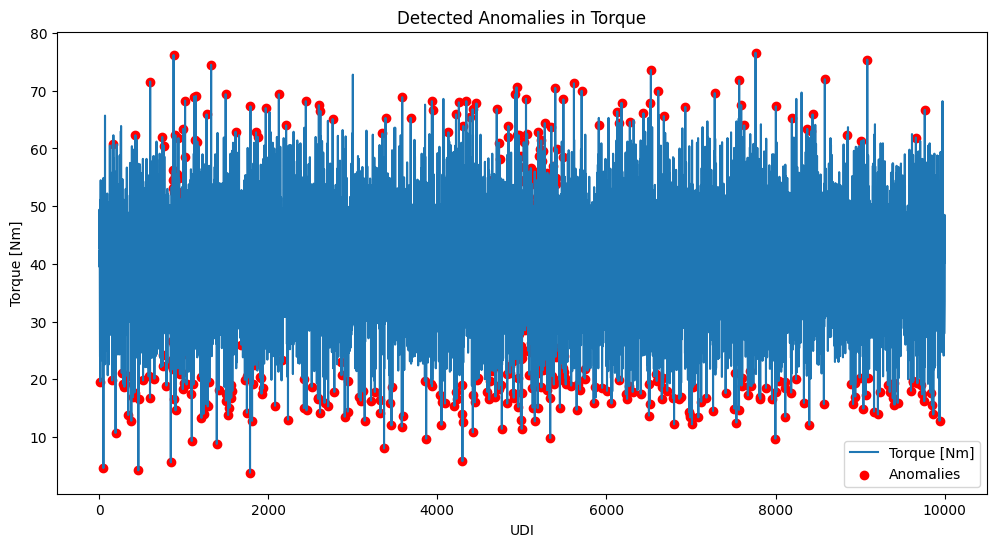

In [23]:
import matplotlib.pyplot as plt

# Plotting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['UDI'], df['Torque [Nm]'], label='Torque [Nm]')
plt.scatter(df[df['Anomaly'] == True]['UDI'], df[df['Anomaly'] == True]['Torque [Nm]'], color='red', label='Anomalies')
plt.xlabel('UDI')
plt.ylabel('Torque [Nm]')
plt.title('Detected Anomalies in Torque')
plt.legend()
plt.show()
